In [1]:
from qutip import *
from numpy import sqrt, pi, array, sin, cos, arange
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pz = basis(2,0) # i.e. the column vector (1,0)
mz = basis(2,1) # i.e. the column vector (0,1)
px = 1/sqrt(2)*(pz + mz)
mx = 1/sqrt(2)*(pz - mz)
py = 1/sqrt(2)*(pz + 1j*mz)
my = 1/sqrt(2)*(pz - 1j*mz)

In [4]:
Sx = 1/2.0*sigmax()
Sy = 1/2.0*sigmay()
Sz = 1/2.0*sigmaz()
omega = 5
Hz = -omega*Sz

In [5]:
t = arange(0,4*pi/omega,0.05)
expect_ops = [Sx,Sy,Sz]
psi0 = px
result = sesolve(Hz, psi0, t, expect_ops)

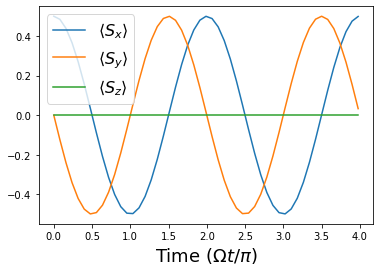

In [19]:
labels = ['x','y','z']
#style = {'x':''--'', 'y':''--'', 'z':''-''}
for r,l in zip(result.expect,labels):
    plt.plot(t*omega/pi, r,
    label="$\langle S_%c \\rangle $" % l)
plt.xlabel("Time ($\Omega t/\pi$)", size=18)
plt.legend(fontsize=16)

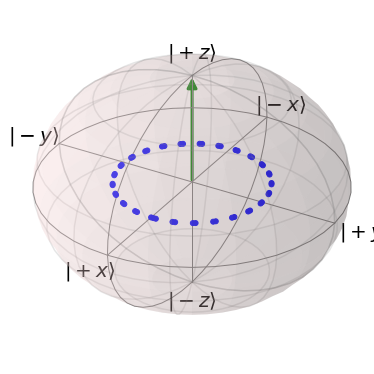

In [24]:
sx, sy, sz = result.expect
b = Bloch()
b.add_points([sx,sy,sz])
b.zlabel = ['$\\left|+z\\right>$',
'$\\left|-z\\right>$']
b.ylabel = ['$\\left|+y\\right>$',
'$\\left|-y\\right>$']
b.xlabel = ['$\\left|+x\\right>$',
'$\\left|-x\\right>$']
b.add_vectors([0,0,1])
b.show()